In [17]:
import pandas as pd
import yfinance as yf
from datetime import datetime as dt
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use("default")
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [18]:
today_date = dt.today().strftime("%Y%m%d")
today_date

'20241221'

In [19]:
#import porfolio
path = f"C:/Users/Chevy/Documents/Trade/Portfolio/{today_date}_MUA.csv"
portfolio = pd.read_csv(path)

In [20]:
portfolio

,Symbol,Name,Qty@Price,Available QTY,Diluted Cost,Market Value,% Chg,P/L,Today's P/L,% Portfolio,Today's Turnover,Today's Purchase@Avg Price,Today's Sales@Avg Price,Currency,Market,Symbol.1,Unnamed: 16
0,BAC,Bank of America,-8@44.29,-8,44.312,-354.32,+0.05%,0.18,0.18,-10.47%,354.50,0@--,8@44.3125,USD,US,NaN,NaN
1,BABA,Alibaba,0@82.72,0,0.000,0.00,0.00%,20.67,4.68,0.00%,248.25,3@82.7497,0@--,USD,US,NaN,NaN
2,TSLL,Direxion Daily TSLA Bull 2X Shares,15@33.765,15,35.409,506.47,-4.64%,-24.67,14.48,+14.97%,0.00,0@--,0@--,USD,US,NaN,NaN
3,RKLB,Rocket Lab,40@24.73,40,20.304,989.20,+21.80%,177.03,60.40,+29.24%,0.00,0@--,0@--,USD,US,NaN,NaN
4,PLTR,Palantir,0@78.671,0,0.000,0.00,0.00%,23.17,25.80,0.00%,471.06,0@--,6@78.51,USD,US,NaN,NaN
5,GEV,GE Vernova,2@342.81,0,326.140,685.62,+5.11%,33.34,20.52,+20.27%,0.00,0@--,0@--,USD,US,NaN,NaN


In [21]:
portfolio = portfolio[portfolio["Market Value"] != 0]

In [22]:
portfolio


,Symbol,Name,Qty@Price,Available QTY,Diluted Cost,Market Value,% Chg,P/L,Today's P/L,% Portfolio,Today's Turnover,Today's Purchase@Avg Price,Today's Sales@Avg Price,Currency,Market,Symbol.1,Unnamed: 16
0,BAC,Bank of America,-8@44.29,-8,44.312,-354.32,+0.05%,0.18,0.18,-10.47%,354.5,0@--,8@44.3125,USD,US,NaN,NaN
2,TSLL,Direxion Daily TSLA Bull 2X Shares,15@33.765,15,35.409,506.47,-4.64%,-24.67,14.48,+14.97%,0.0,0@--,0@--,USD,US,NaN,NaN
3,RKLB,Rocket Lab,40@24.73,40,20.304,989.20,+21.80%,177.03,60.40,+29.24%,0.0,0@--,0@--,USD,US,NaN,NaN
5,GEV,GE Vernova,2@342.81,0,326.140,685.62,+5.11%,33.34,20.52,+20.27%,0.0,0@--,0@--,USD,US,NaN,NaN


In [23]:
assets = list(portfolio["Symbol"])

portfolio["Market Value (abs)"] = abs(portfolio["Market Value"])

total_mv = portfolio["Market Value (abs)"].sum()
market_value = list(portfolio["Market Value"])
weight = list(market_value / total_mv)


C:\Users\Chevy\AppData\Local\Temp\ipykernel_21276\934393751.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  portfolio["Market Value (abs)"] = abs(portfolio["Market Value"])


In [24]:
weight

[-0.1397375779398251,
 0.19974286266421099,
 0.39012308675230023,
 0.2703964726436636]

In [25]:

def get_data(assets):
    data = yf.download(assets, period="max")['Adj Close']
    return data

def get_correclation_heatmap(data):
    d_returns = data.pct_change().dropna()
    corr = d_returns.corr()

    plt.figure(figsize=(8,6))

    mask = np.triu(np.ones_like(corr, dtype=bool))

    sns.heatmap(
        corr,
        annot=True,
        cmap="coolwarm",
        fmt=".2f",
        linewidths=0.5,
        annot_kws={"size": 7},
        mask=mask
    )

    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()  


def portfolio_volatility(assets, weights):
    data = yf.download(assets, period="max")['Adj Close']
    returns = data.pct_change().dropna()

    cov_matrix_daily = returns.cov()
    cov_matrix_weekly = cov_matrix_daily * 5
    cov_matrix_monthly = cov_matrix_daily * 21
    cov_matrix_quarterly = cov_matrix_daily * 63
    cov_matrix_annual = cov_matrix_daily * 252

    daily_volatility = np.sqrt(np.dot(weights, np.dot(cov_matrix_daily, weights)))
    weekly_volatility = np.sqrt(np.dot(weights, np.dot(cov_matrix_weekly, weights)))
    monthly_volatility = np.sqrt(np.dot(weights, np.dot(cov_matrix_monthly, weights)))
    quarterly_volatility = np.sqrt(np.dot(weights, np.dot(cov_matrix_quarterly, weights)))
    annual_volatility = np.sqrt(np.dot(weights, np.dot(cov_matrix_annual, weights)))

    
    # Display the results
    print(f"Portfolio Daily Volatility: {daily_volatility:.2%}")
    print(f"Portfolio Weekly Volatility: {weekly_volatility:.2%}")
    print(f"Portfolio Monthly Volatility: {monthly_volatility:.2%}")
    print(f"Portfolio Quarterly Volatility: {quarterly_volatility:.2%}")
    print(f"Portfolio Annual Volatility: {annual_volatility:.2%}")

    
    
def benchmark_volatility(benchmark_symbol):
    # Download historical data for the benchmark
    benchmark_data = yf.download(benchmark_symbol, period="1y")['Adj Close']
    benchmark_returns = benchmark_data.pct_change().dropna()

    # Calculate daily covariance (variance in this case as it's a single asset)
    daily_variance = benchmark_returns.var()
    
    # Scale to weekly, monthly, quarterly, and annual variances
    weekly_variance = daily_variance * 5
    monthly_variance = daily_variance * 21
    quarterly_variance = daily_variance * 63
    annual_variance = daily_variance * 252

    # Calculate volatility (square root of variance)
    daily_volatility = np.sqrt(daily_variance)
    weekly_volatility = np.sqrt(weekly_variance)
    monthly_volatility = np.sqrt(monthly_variance)
    quarterly_volatility = np.sqrt(quarterly_variance)
    annual_volatility = np.sqrt(annual_variance)

    # Display the results
    print(f"Benchmark Daily Volatility: {daily_volatility:.2%}")
    print(f"Benchmark Weekly Volatility: {weekly_volatility:.2%}")
    print(f"Benchmark Monthly Volatility: {monthly_volatility:.2%}")
    print(f"Benchmark Quarterly Volatility: {quarterly_volatility:.2%}")
    print(f"Benchmark Annual Volatility: {annual_volatility:.2%}")




[*********************100%***********************]  5 of 5 completed


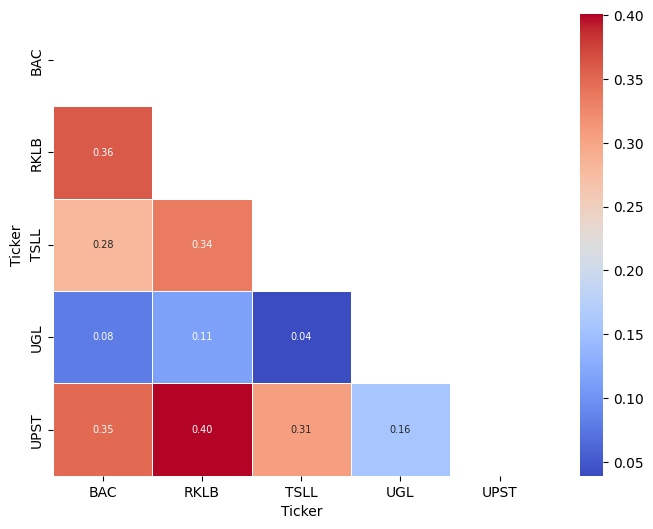

In [29]:
#Plot the correlation heatmap if you want to enter a new position
new_assets = ["RKLB","UPST","TSLL","BAC","UGL"]
get_correclation_heatmap(get_data(new_assets))

[*********************100%***********************]  4 of 4 completed


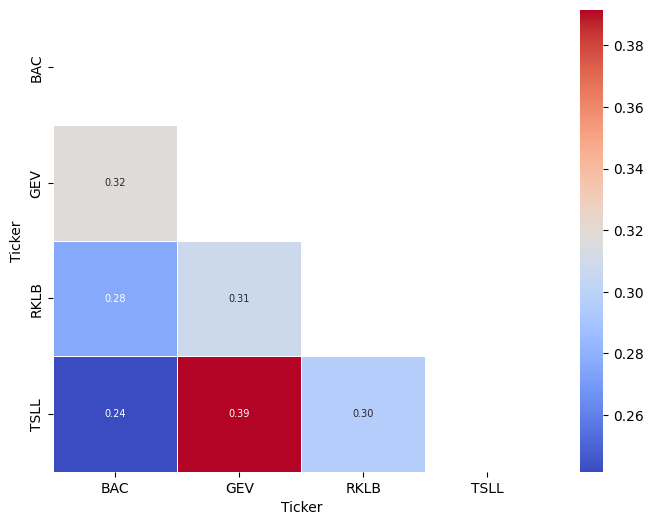

In [27]:
get_correclation_heatmap(get_data(assets))

In [28]:
portfolio_volatility(assets,weight)
benchmark_volatility("^GSPC")

[*********************100%***********************]  4 of 4 completed
[*********************100%***********************]  1 of 1 completed

Portfolio Daily Volatility: 3.66%
Portfolio Weekly Volatility: 8.18%
Portfolio Monthly Volatility: 16.76%
Portfolio Quarterly Volatility: 29.03%
Portfolio Annual Volatility: 58.07%
Benchmark Daily Volatility: 0.79%
Benchmark Weekly Volatility: 1.77%
Benchmark Monthly Volatility: 3.64%
Benchmark Quarterly Volatility: 6.30%
Benchmark Annual Volatility: 12.59%
